In [45]:
#importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#loading the data
studentdata = pd.read_csv("contents/studentdata.csv.txt")

In [3]:
#Converting it into dataframe
sdf = pd.DataFrame(studentdata)

#  1) Understanding the data
Changed the semicolons in the original data to commas.
Understanding the structure of the data

In [4]:
#Finding the first five rows in the dataset
studentdata.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
#Finding the last 5 rows in the dataset
studentdata.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [6]:
#Finding the columns and rows in the dataset
studentdata.shape

(4424, 37)

In [7]:
#Describing each variables in the dataset
studentdata.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
#Finding the unique entries in each feature
studentdata.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

In [9]:
studentdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Cleaning of Data

In [10]:
#Checking if there is any null or missing values
studentdata.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

There are no null or missing values in this dataset and hence the cleaning of data is not necessarily needed.

#  EXPLORATORY DATA ANALYSIS

C:\Users\raakh\AppData\Local\Temp\ipykernel_6320\1475565582.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("General Explore.png")
D:\Anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


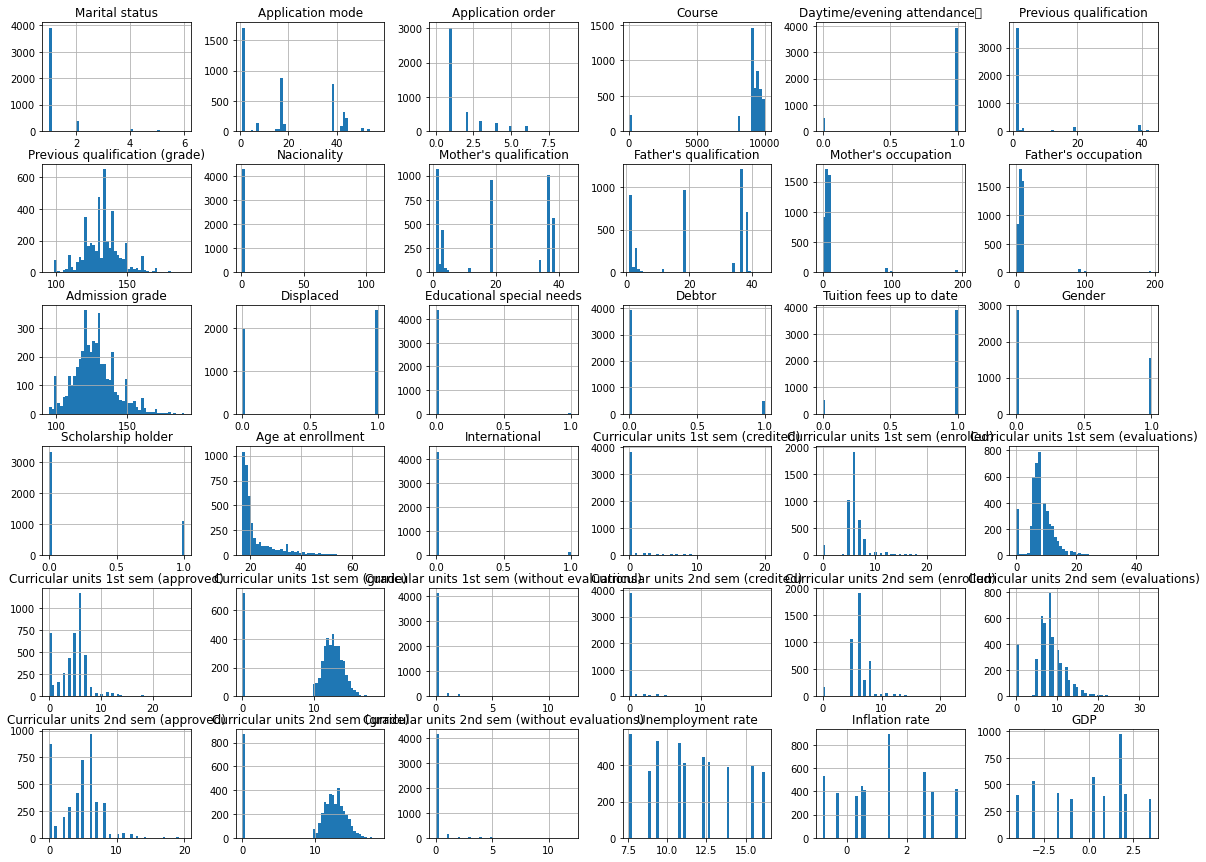

In [11]:
#Exploring through various features of data
studentdata[studentdata.columns].hist(bins=50, figsize=(20,15))
plt.savefig("General Explore.png") 

D:\Anaconda\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
D:\Anaconda\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\raakh\AppData\Local\Temp\ipykernel_6320\3897072920.py:4: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("Correlationheatmap.png") # save as png


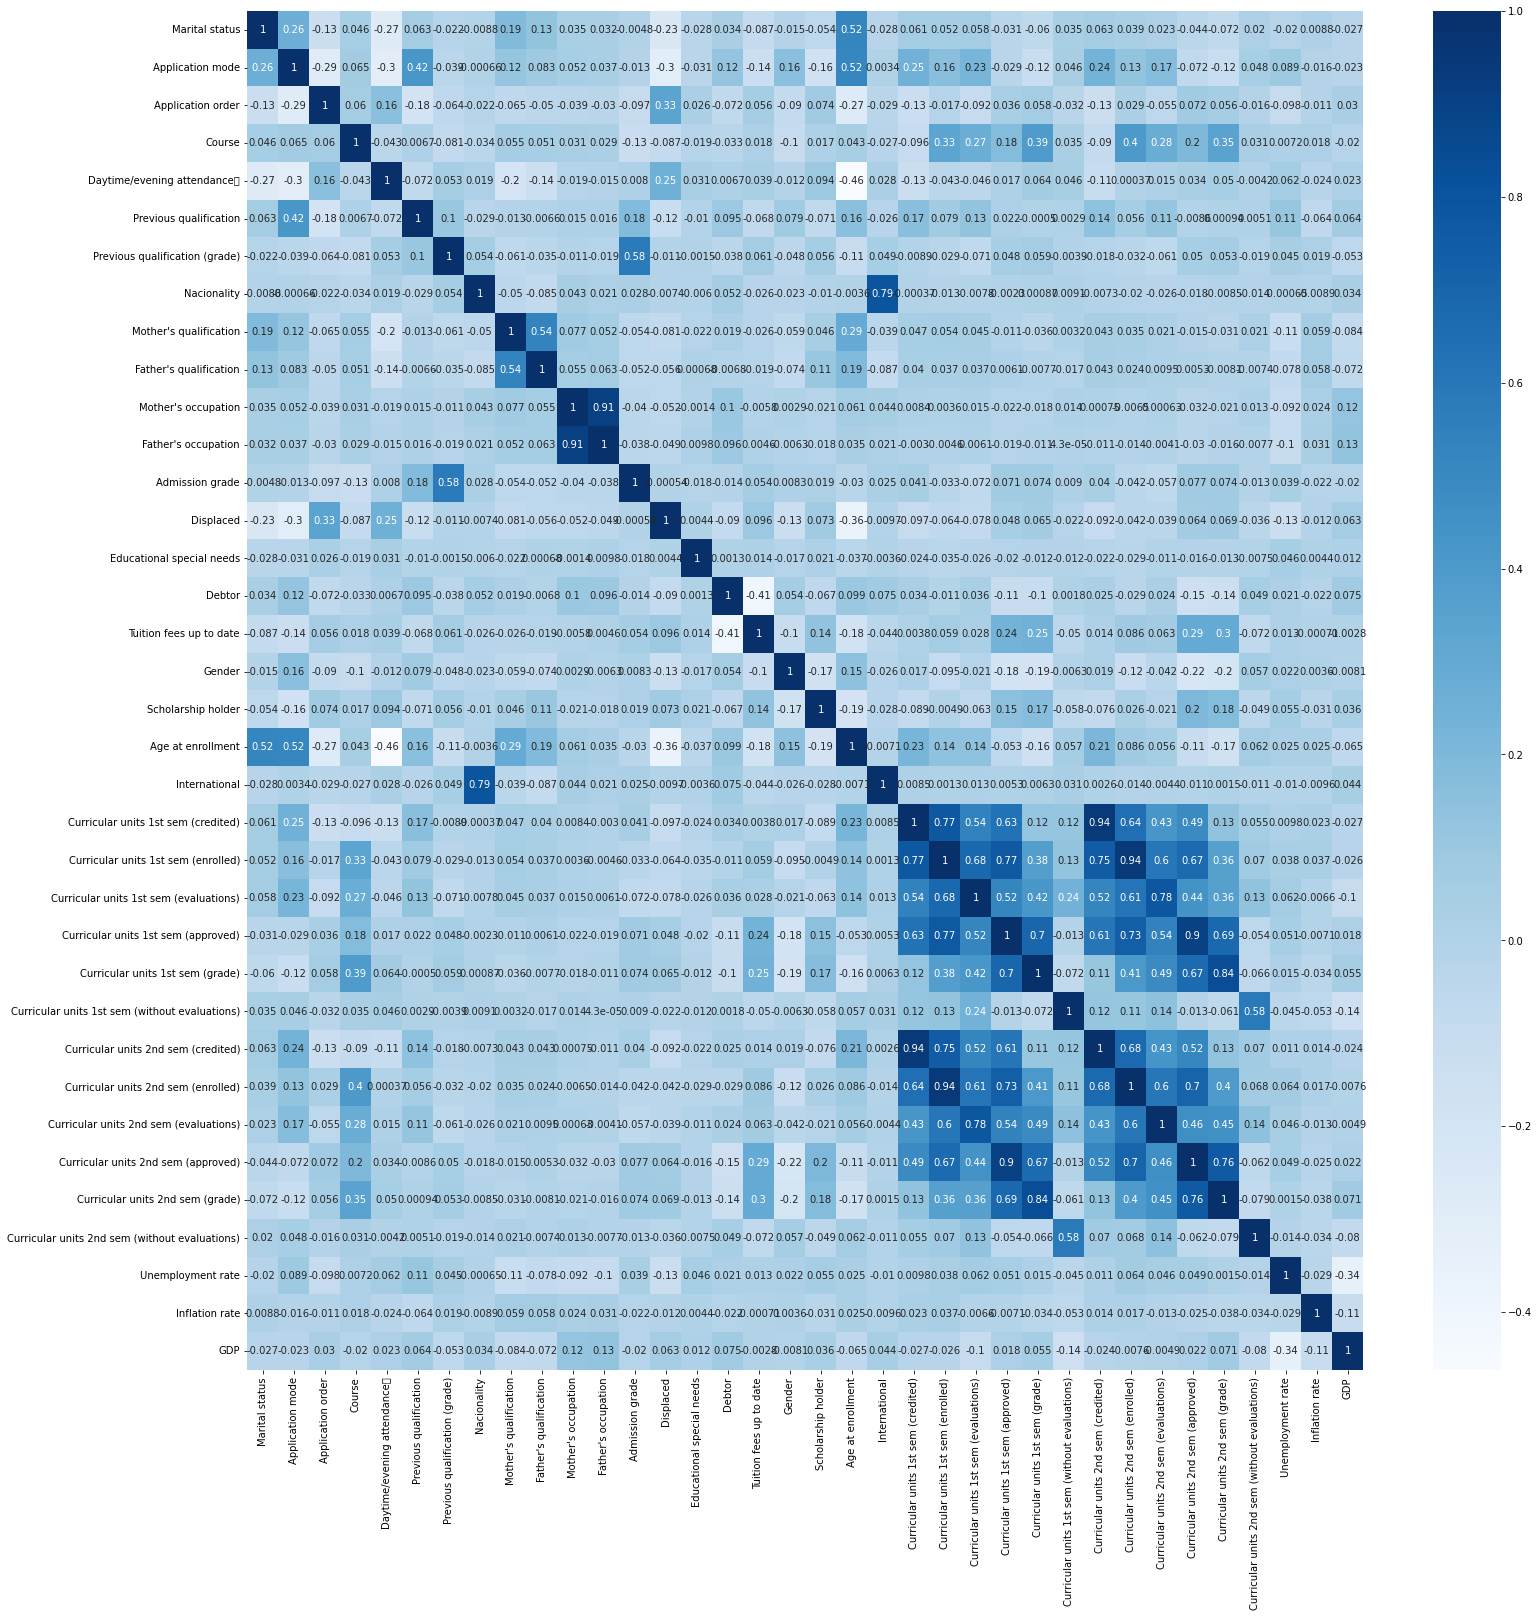

In [12]:
# Plotting a correlation matrix 
plt.figure(figsize=(25,25))
sns.heatmap(studentdata.corr(),cbar=True,annot=True,cmap='Blues')
plt.savefig("Correlationheatmap.png") # save as png

# Stratified KFold Cross Validation with default value

In [13]:
X = sdf.drop(['Target'],axis = 1)
y = sdf.Target

In [14]:
#Train-test split
x_train_fold, x_test_fold, y_train_fold, y_test_fold = train_test_split(X, y, random_state=0)

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
x_train_fold = feature_scaler.fit_transform(x_train_fold)
x_test_fold = feature_scaler.transform(x_test_fold)

In [17]:
rfc = RandomForestClassifier()

In [18]:
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=1)
lst_accu_stratified = []
  
#Model Training
rfc.fit(x_train_fold, y_train_fold)
all_accuracies = cross_val_score(estimator=rfc, X=x_train_fold, y=y_train_fold, cv=5)
print("List of possible accuracy : ", all_accuracies)
print("Max accuracy possible : ", max(all_accuracies))
print("Mean : ",all_accuracies.mean())
print("Standard Deviation : ",all_accuracies.std())

List of possible accuracy :  [0.7560241  0.7876506  0.73795181 0.76470588 0.76168929]
Max accuracy possible :  0.7876506024096386
Mean :  0.7616043358956186
Standard Deviation :  0.01599134761333293


## RFC with hyper parameter tuning 

In [20]:
grid_param_rfc = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [21]:
gd_sr_rfc = GridSearchCV(estimator=rfc,
                     param_grid=grid_param_rfc,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [22]:
gd_sr_rfc.fit(x_train_fold, y_train_fold)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 300, 500, 800, 1000]},
             scoring='accuracy')

In [23]:
best_parameters_rfc = gd_sr_rfc.best_params_
print(best_parameters_rfc)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 500}


In [24]:
best_result = gd_sr_rfc.best_score_
print(best_result)

0.7670312670622066


# RANDOM FOREST CLASSIFIER

In [25]:
rfc.fit(x_train_fold,y_train_fold)

RandomForestClassifier()

In [26]:
predictions = rfc.predict(x_test_fold)

In [28]:
print("Accuracy: ", accuracy_score(y_test_fold,predictions))
#print("F1 score: ", f1_score(y_test_fold,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test_fold,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test_fold,predictions))
print("\n")
print(confusion_matrix(y_test_fold,predictions))

Accuracy:  0.8037974683544303


              precision    recall  f1-score   support

     Dropout       0.83      0.79      0.81       353
    Enrolled       0.61      0.42      0.50       193
    Graduate       0.83      0.94      0.88       560

    accuracy                           0.80      1106
   macro avg       0.76      0.72      0.73      1106
weighted avg       0.79      0.80      0.79      1106



[[279  33  41]
 [ 44  81  68]
 [ 13  18 529]]


# SVM

In [30]:
model_svc = SVC()

In [31]:
model_svc.fit(x_train_fold,y_train_fold)

SVC()

In [32]:
predictions = model_svc.predict(x_test_fold)

In [33]:
print("Accuracy: ", accuracy_score(y_test_fold,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test_fold,predictions))
print("\n")
print(confusion_matrix(y_test_fold,predictions))

Accuracy:  0.7730560578661845


              precision    recall  f1-score   support

     Dropout       0.84      0.71      0.77       353
    Enrolled       0.54      0.36      0.43       193
    Graduate       0.79      0.96      0.86       560

    accuracy                           0.77      1106
   macro avg       0.72      0.68      0.69      1106
weighted avg       0.76      0.77      0.76      1106



[[249  46  58]
 [ 36  70  87]
 [ 11  13 536]]


# Hyper parameter tuning for SVM

In [34]:
param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [35]:
gd_sr_svm = GridSearchCV(estimator=model_svc,
                     param_grid=param_grid_svm,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1,
                     refit=True,verbose=2)
gd_sr_svm.fit(x_train_fold, y_train_fold)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [36]:
best_parameters_svm = gd_sr_svm.best_params_
print(best_parameters_svm)
best_result_svm = gd_sr_svm.best_score_
print(best_result_svm)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.7649264732646598


# KNN

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)

In [39]:
knn.fit(x_train_fold,y_train_fold)

KNeighborsClassifier(n_neighbors=1)

In [40]:
predictions = knn.predict(x_test_fold)

In [41]:
print("Accuracy: ", accuracy_score(y_test_fold,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test_fold,predictions))
print("\n")
print(confusion_matrix(y_test_fold,predictions))

Accuracy:  0.6401446654611211


              precision    recall  f1-score   support

     Dropout       0.68      0.61      0.65       353
    Enrolled       0.30      0.36      0.33       193
    Graduate       0.75      0.75      0.75       560

    accuracy                           0.64      1106
   macro avg       0.58      0.58      0.58      1106
weighted avg       0.65      0.64      0.65      1106



[[217  68  68]
 [ 55  69  69]
 [ 46  92 422]]


# Hyper parameter for KNN

In [42]:
k_range = list(range(1, 31))
param_grid_knn = dict(n_neighbors=k_range)

In [43]:
gd_sr_knn = GridSearchCV(estimator=knn,
                     param_grid=param_grid_knn,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1,
                     return_train_score=False,verbose=1)
gd_sr_knn.fit(x_train_fold, y_train_fold)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=1), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [44]:
best_parameters_knn = gd_sr_knn.best_params_
print(best_parameters_knn)
best_result_knn = gd_sr_knn.best_score_
print(best_result_knn)

{'n_neighbors': 19}
0.7076638881811232
